In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,932 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/세종시/세종시_산업_대표자연령대별_사업체수.csv", encoding='cp949')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역별   117 non-null    object
 1   산업별     117 non-null    object
 2   대표자연령대  117 non-null    object
 3   2017    117 non-null    object
 4   2018    117 non-null    object
 5   2019    117 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [ ]:
df['산업별'] = df['산업별'].str.split('(').str[0]
df

,행정구역별,산업별,대표자연령대,2017,2018,2019
0,세종,전체 산업,계,13668,15871,18041
1,세종,전체 산업,29세 이하,526,582,671
2,세종,전체 산업,30~39세,2415,2749,2968
3,세종,전체 산업,40~49세,4193,5022,5669
4,세종,전체 산업,50~59세,4408,5036,5716
...,...,...,...,...,...,...
112,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",29세 이하,22,40,45
113,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",30~39세,224,270,263
114,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",40~49세,378,502,605
115,세종,"협회 및 단체, 수리 및 기타 개인 서비스업",50~59세,388,437,508


In [ ]:
df1 = df[['산업별', '대표자연령대', '2019']]
df1 = df1.replace('-', '0')
df1['2019'] = df1['2019'].apply(pd.to_numeric)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업별     117 non-null    object
 1   대표자연령대  117 non-null    object
 2   2019    117 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
df_1 = df1[df1['산업별'] == '공공행정, 국방 및 사회보장 행정']
df_2 = df1[df1['산업별'] == '제조업']
df_3 = df1[df1['산업별'] == '교육 서비스업']

In [ ]:
df_1

,산업별,대표자연령대,2019
88,"공공행정, 국방 및 사회보장 행정",계,130
89,"공공행정, 국방 및 사회보장 행정",30~39세,4
90,"공공행정, 국방 및 사회보장 행정",40~49세,16
91,"공공행정, 국방 및 사회보장 행정",50~59세,96
92,"공공행정, 국방 및 사회보장 행정",60세 이상,14


In [ ]:
df_2

,산업별,대표자연령대,2019
17,제조업,계,1300
18,제조업,29세 이하,33
19,제조업,30~39세,142
20,제조업,40~49세,285
21,제조업,50~59세,506
22,제조업,60세 이상,334


In [ ]:
df_3

,산업별,대표자연령대,2019
93,교육 서비스업,계,1354
94,교육 서비스업,29세 이하,63
95,교육 서비스업,30~39세,322
96,교육 서비스업,40~49세,542
97,교육 서비스업,50~59세,364
98,교육 서비스업,60세 이상,63


In [ ]:
df_1['2019'] = df_1['2019'][1:].apply(lambda x : (x/130)*100)
df_2['2019'] = df_2['2019'][1:].apply(lambda x : (x/1300)*100)
df_3['2019'] = df_3['2019'][1:].apply(lambda x : (x/1354)*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_1 = df_1[1:]
df_2 = df_2[1:]
df_3 = df_3[1:]

In [ ]:
df_1['연령비율(%)'] = round(df_1['2019'],2)
df_2['연령비율(%)'] = round(df_2['2019'],2)
df_3['연령비율(%)'] = round(df_3['2019'],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_1 = df_1.sort_values(by = '연령비율(%)', ascending=False)
df_2 = df_2.sort_values(by = '연령비율(%)', ascending=False)
df_3 = df_3.sort_values(by = '연령비율(%)', ascending=False)

In [ ]:
# 1. 공공행정, 국방 및 사회보장 행정
df_A = df_1[['대표자연령대', '연령비율(%)']]
df_A

,대표자연령대,연령비율(%)
91,50~59세,73.85
90,40~49세,12.31
92,60세 이상,10.77
89,30~39세,3.08


In [ ]:
# 2. 제조업
df_B = df_2[['대표자연령대', '연령비율(%)']]
df_B

,대표자연령대,연령비율(%)
21,50~59세,38.92
22,60세 이상,25.69
20,40~49세,21.92
19,30~39세,10.92
18,29세 이하,2.54


In [ ]:
# 3. 교육 서비스업
df_C = df_3[['대표자연령대', '연령비율(%)']]
df_C

,대표자연령대,연령비율(%)
96,40~49세,40.03
97,50~59세,26.88
95,30~39세,23.78
94,29세 이하,4.65
98,60세 이상,4.65


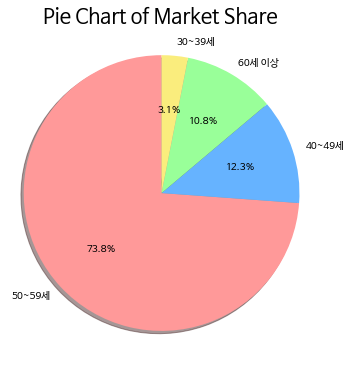

In [ ]:
# Pie chart_공공행정, 국방 및 사회보장 행정

labels = df_A['대표자연령대']
sizes = df_A['연령비율(%)']

explode = (0, 0, 0, 0)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#FAED7D']
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('공공행정', fontsize=20)
plt.show()

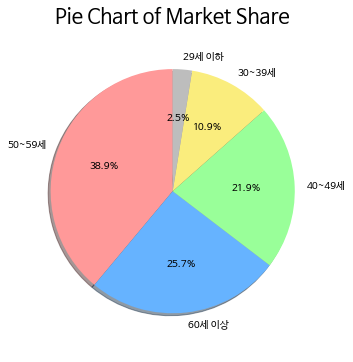

In [ ]:
# Pie chart_제조업

labels = df_B['대표자연령대']
sizes = df_B['연령비율(%)']

explode = (0, 0, 0, 0, 0)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#FAED7D', '#bdbdbd']
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('제조업', fontsize=20)
plt.show()

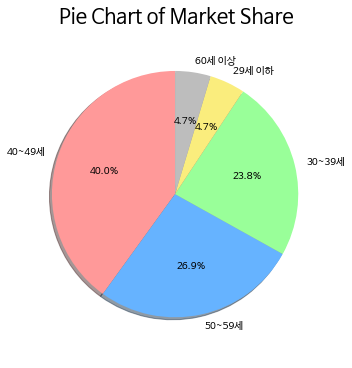

In [ ]:
# Pie chart_교육 서비스업

labels = df_C['대표자연령대']
sizes = df_C['연령비율(%)']

explode = (0, 0, 0, 0, 0)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#FAED7D', '#bdbdbd']
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('교육 서비스업', fontsize=20)
plt.show()